<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/Linear_regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install ipympl

import os
os.kill(os.getpid(), 9)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
from IPython import display
from google.colab import output
import time

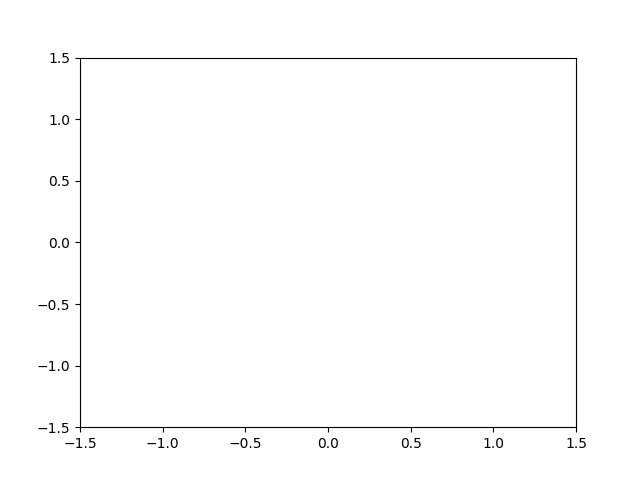

In [ ]:
%matplotlib widget
output.enable_custom_widget_manager()
fig1 = plt.figure(1)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

data_2d=np.zeros((0,2))
def onclick(event):
  global data_2d
  ix,iy=event.xdata,event.ydata
  tmp = np.asarray([[ix, iy]]) # (1, 2)
  data_2d = np.vstack((data_2d, tmp))
  plt.clf() #clear the current figure
  plt.xlim([-1.5, 1.5])
  plt.ylim([-1.5, 1.5])
  plt.scatter(data_2d[:,0], data_2d[:, 1])

# Add an button press event handler to the figure, attach the onclick method to it
cid = fig1.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
print(data_2d.shape)

(27, 2)


In [ ]:
data_x=data_2d[:,0].reshape(-1,1)
data_label=data_2d[:,1].reshape(-1,1)

In [ ]:
model_linear = tf.keras.models.Sequential()
model_linear.add(
    tf.keras.Input(shape=(1,)) # Input
    )
model_linear.add(tf.keras.layers.Dense( # Linear: tạo 1 ma trận theta và nhân với input - Hàm h
    1, # Số giá trị đầu ra
    use_bias=True # có sử dụng bias hay không, theta_0
    ))

#output = g ( h (input ) )

model_linear.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.5))

print(model_linear.layers)
print(model_linear.layers[0])

In [ ]:
b=model_linear.layers[0].get_weights()[0]
print(b)

[[1.3803571]]


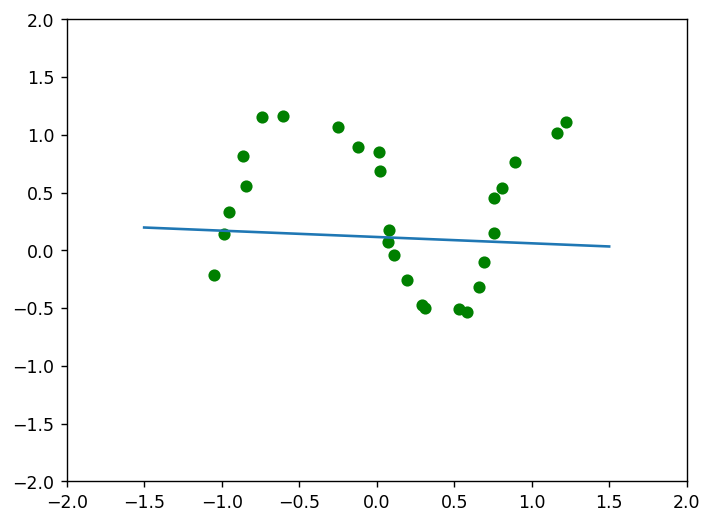

In [ ]:
for i in range(15):
  model_linear.fit(data_x,data_label
                   ,batch_size=20,  #chia thanh tung patch de chay
                   verbose=0    # hien thi
                   ,epochs=1)
  w=float(model_linear.layers[0].get_weights()[0])
  b=float(model_linear.layers[0].get_weights()[1])

  x_range=np.asarray([-1.5 ,1.5])  # plot la ham noi diem de ra mot do thi tuyen tinh
  y_range=x_range*w+b #cac diem tuong ung voi -1,5 voi 1,5

  plt.clf() # clear figure
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.scatter(data_x,data_label,c="g")
  plt.plot(x_range,y_range)
  display.clear_output(wait=True) #de lai hinh cuoi cung , cac hinh luc truoc thi xoa
  display.display(plt.gcf())  # visual the old figure
  time.sleep(0.5)




In [ ]:
def polonymal (x,k):
  x_new=np.copy(x)
  for i in range(2,k+1):
     x_polo=x_new[:,0]**i
     x_polo=x_polo.reshape(-1,1)
     x_new=np.concatenate((x_new,x_polo),1)
  return x_new

x_polo=polonymal(data_x,3)
model_polo=tf.keras.Sequential()
model_polo.add(tf.keras.Input(shape=(3,)))
model_polo.add(tf.keras.layers.Dense(1,use_bias=True))
model_polo.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.05))

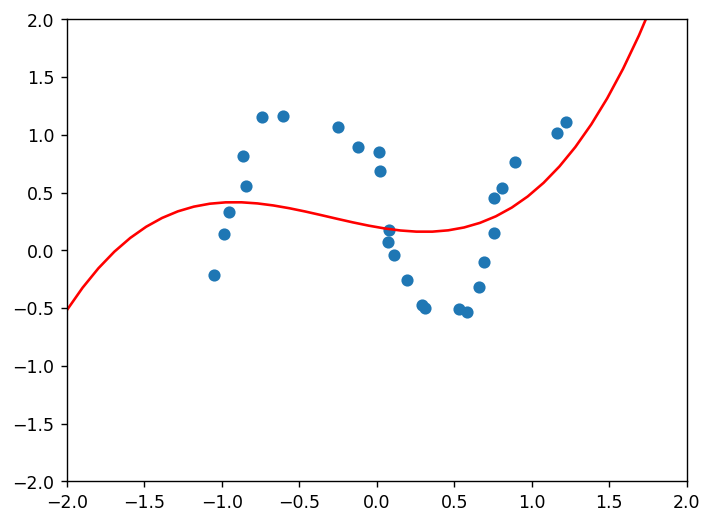

In [ ]:
for i in range(50):
  model_polo.fit(x_polo,data_label,batch_size=20,verbose=0,epochs=1)
  w=model_polo.layers[0].get_weights()[0]
  b=model_polo.layers[0].get_weights()[1][0]
  x_range=np.linspace(-2,2,40)
  for i in range(3):
    b+=w[i][0]*x_range**(i+1)

  plt.clf()
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.scatter(data_2d[:,0], data_2d[:, 1])
  plt.plot(x_range, b, c='r')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  time.sleep(0.5)

In [ ]:
tree_data = pd.read_csv('TS3_Raw_tree_data.csv')
tree_data=tree_data[['DBH (cm)', 'TreeHt (m)','Age']]
tree_data=tree_data.to_numpy()
tree_data=tree_data[tree_data[:,2]!=0]
tree_data=tree_data[tree_data[:,2]!=-1]
tree_x=tree_data[:,:2]
tree_label=tree_data[:,2]

In [ ]:
# normalize data
norm_e=tf.keras.layers.Normalization(axis=-1)
norm_e.adapt(tree_x)
tree_n=norm_e(tree_x)
print(tree_n.shape)

(12475, 2)


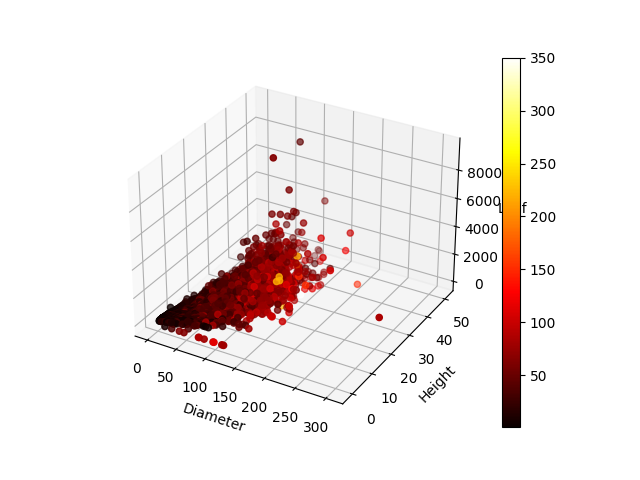

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(tree_data[:,0], tree_data[:,1], tree_data[:,2], c=tree_data[:,3], cmap=plt.hot())
ax.set_xlabel('Diameter')
ax.set_ylabel('Height')
ax.set_zlabel('Leaf')
fig.colorbar(img)
plt.show()

In [ ]:
tf.random.set_seed(1234)
model_tree=tf.keras.models.Sequential()
model_tree.add(tf.keras.Input(shape=(2,)))
model_tree.add(tf.keras.layers.Dense(1,use_bias=True))
model_tree.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005))
model_tree.layers[0].get_weights()[1]


array([0.], dtype=float32)

In [ ]:
model_tree.layers[0].get_weights()[0]
print(tree_n.shape)

(12475, 2)


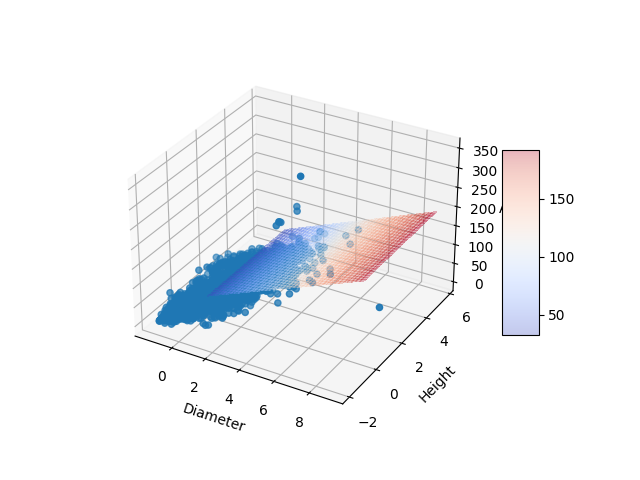

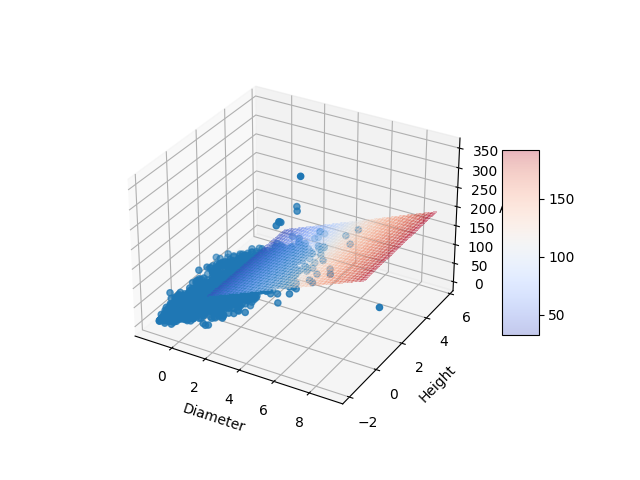

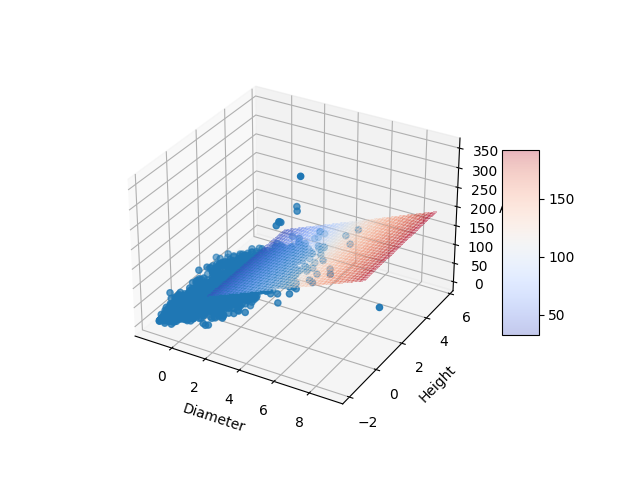

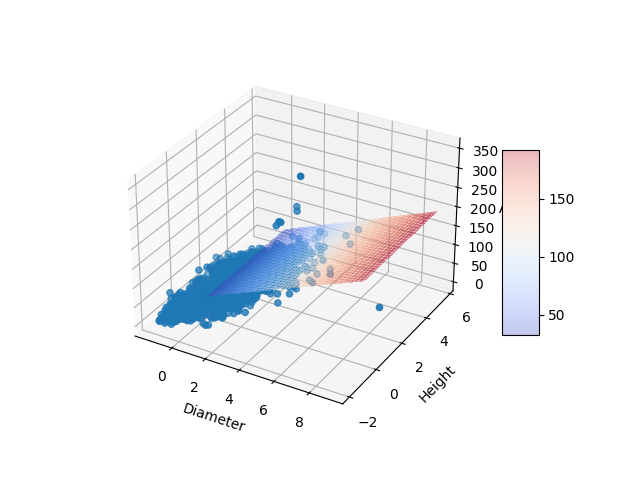

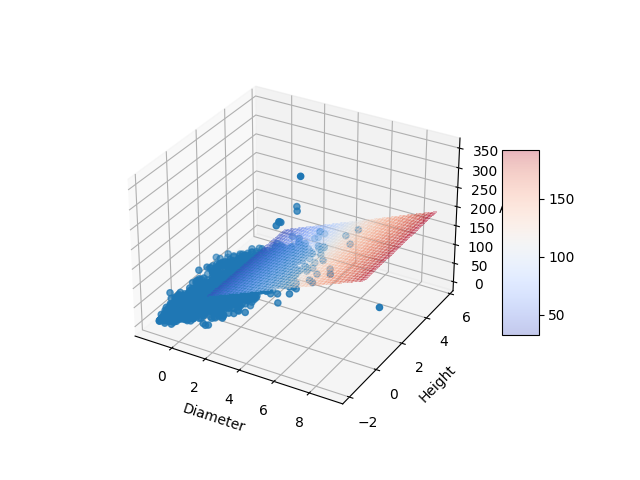

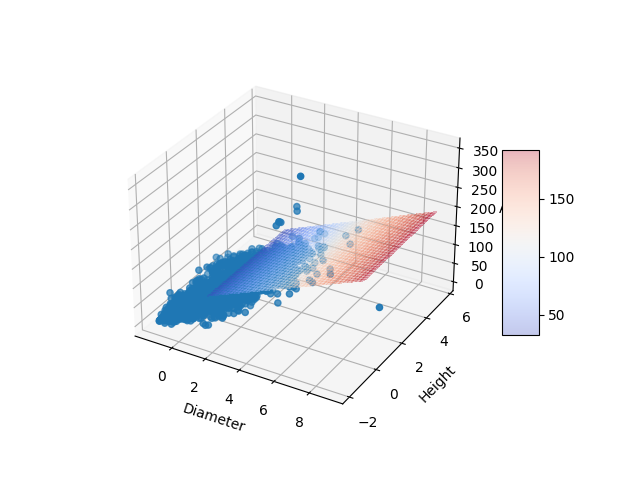

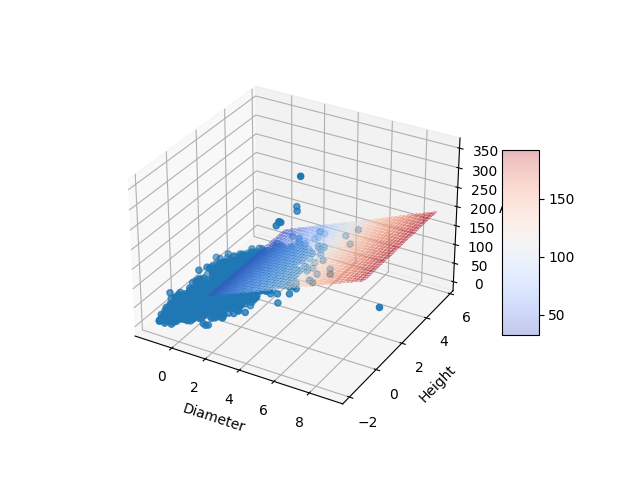

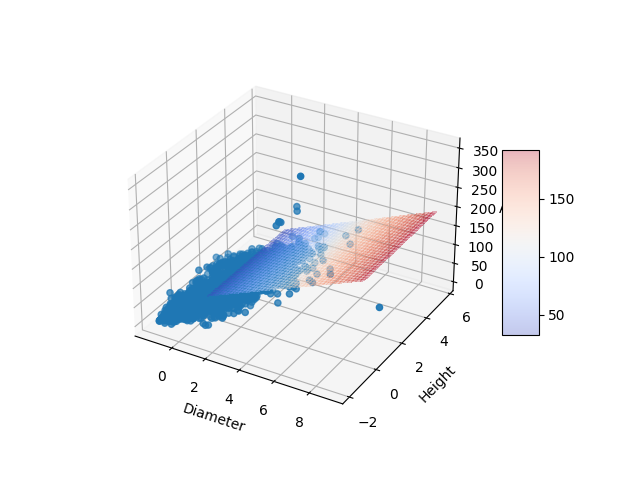

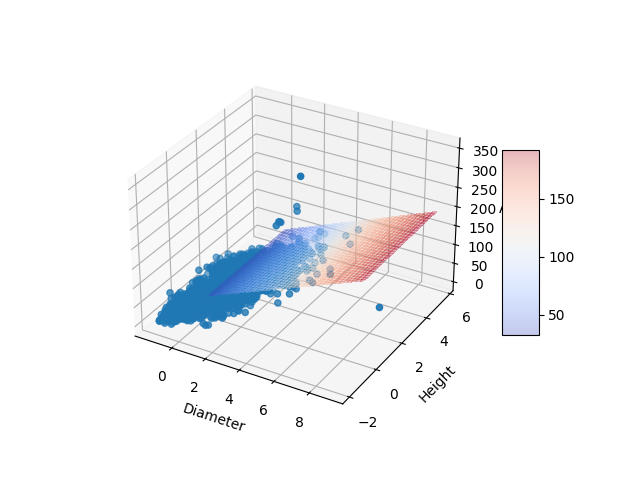

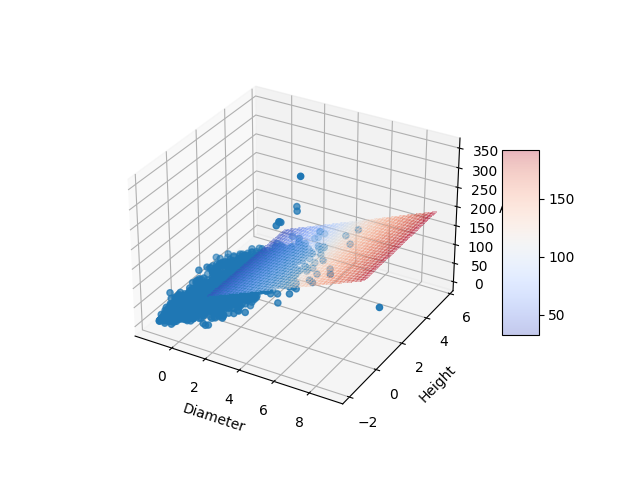

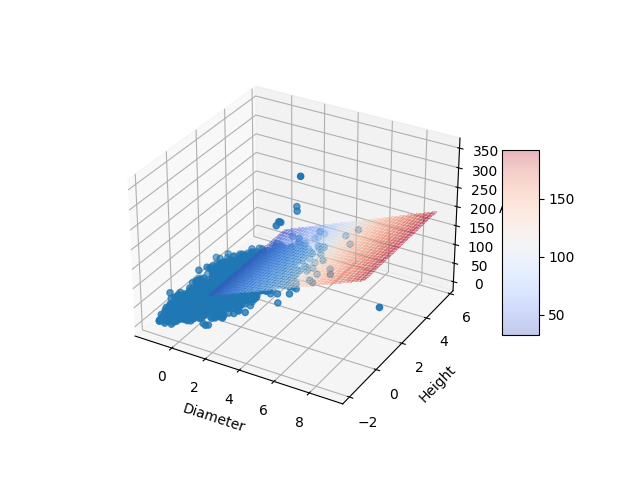

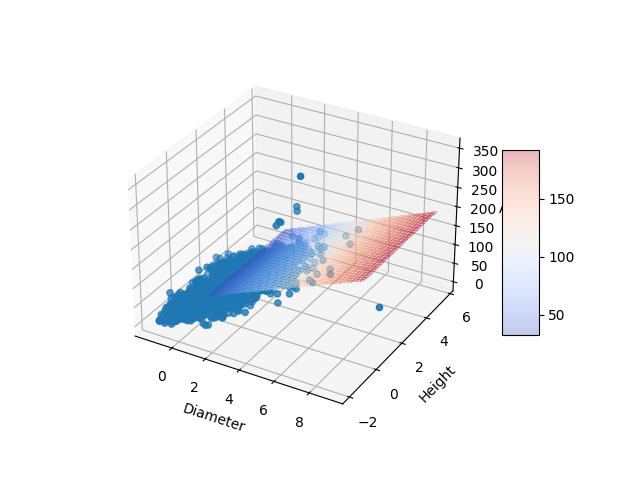

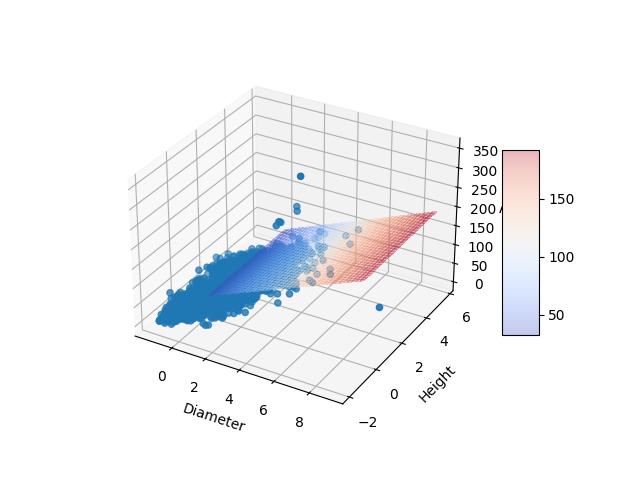

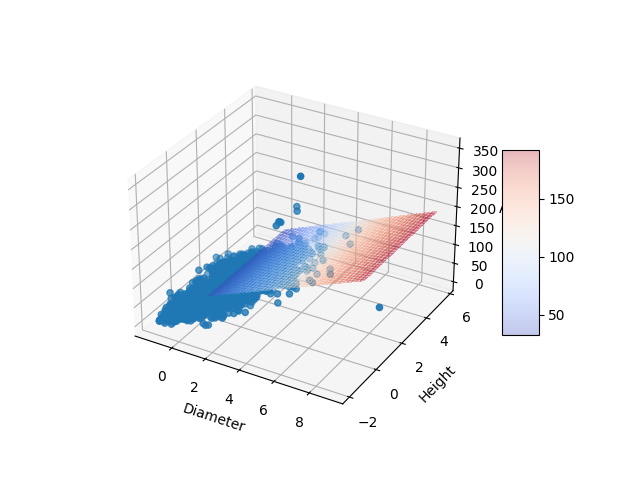

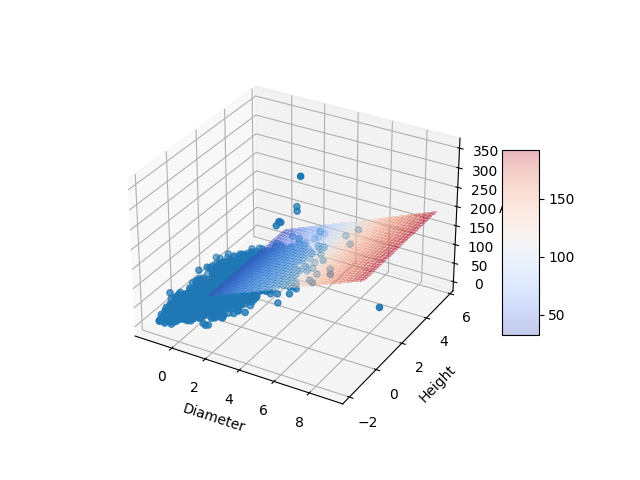

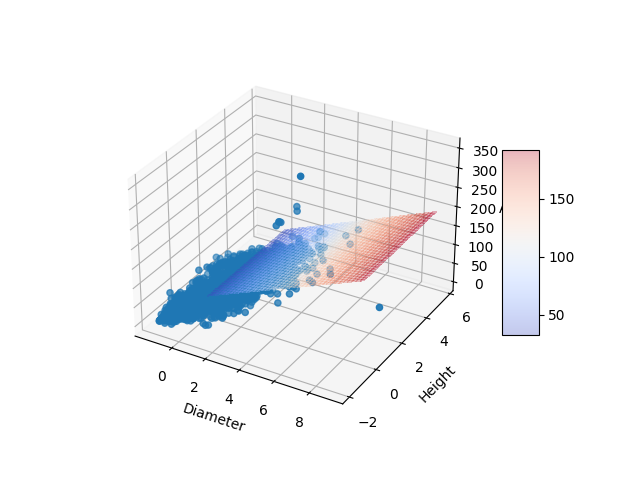

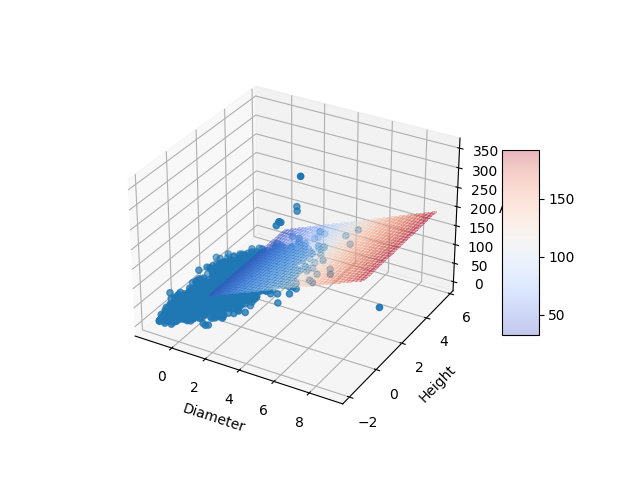

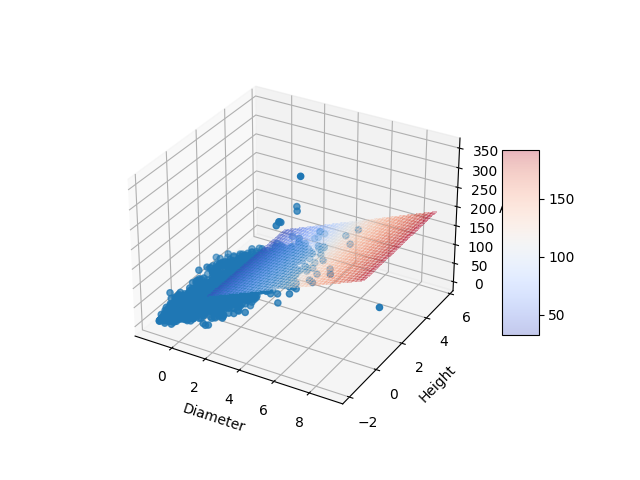

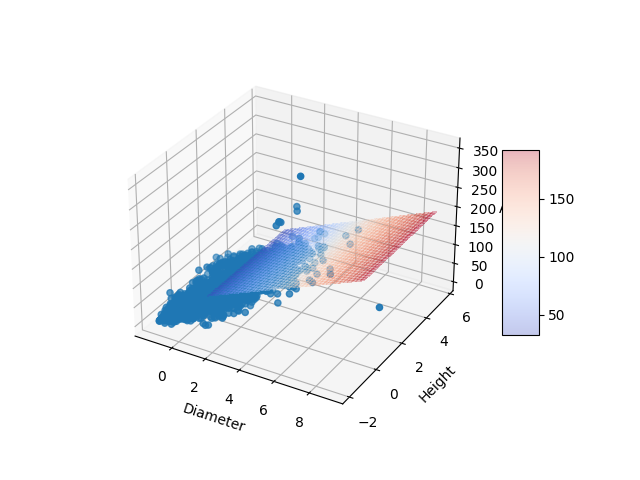

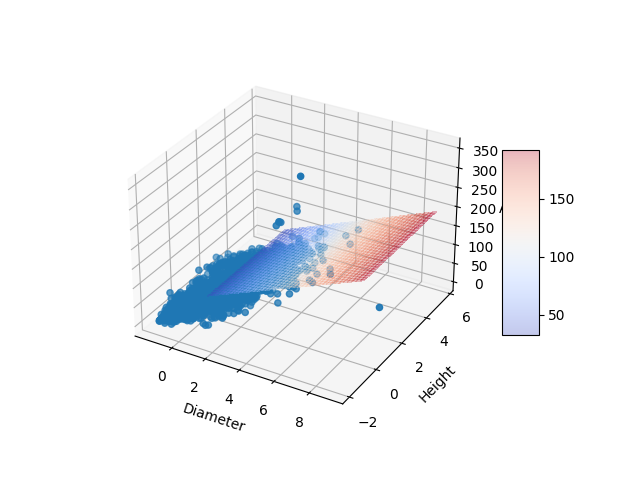

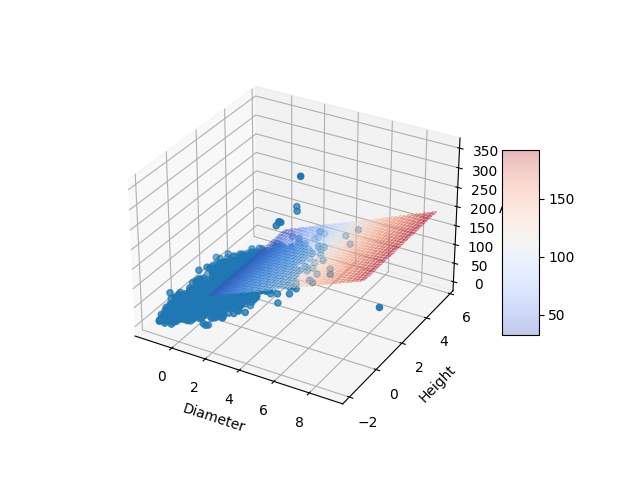

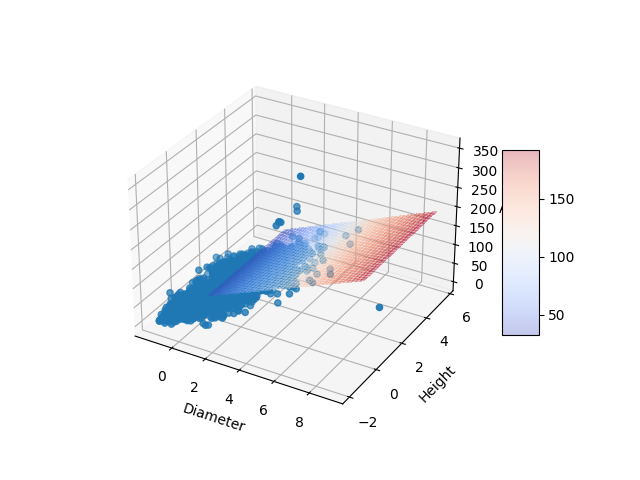

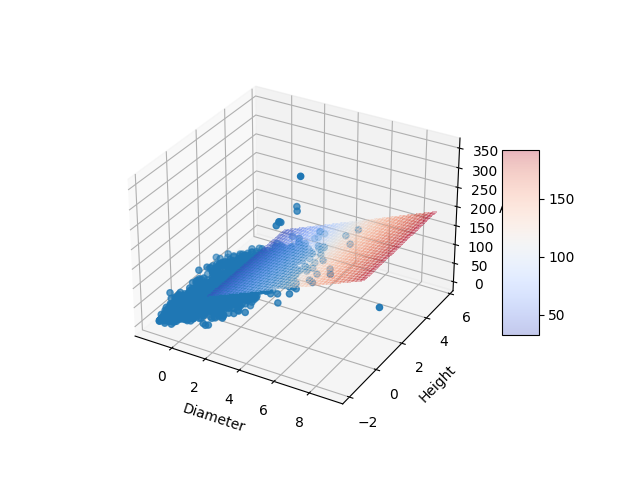

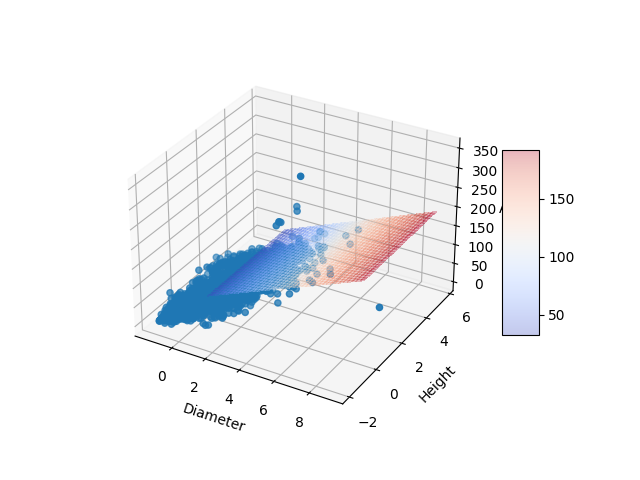

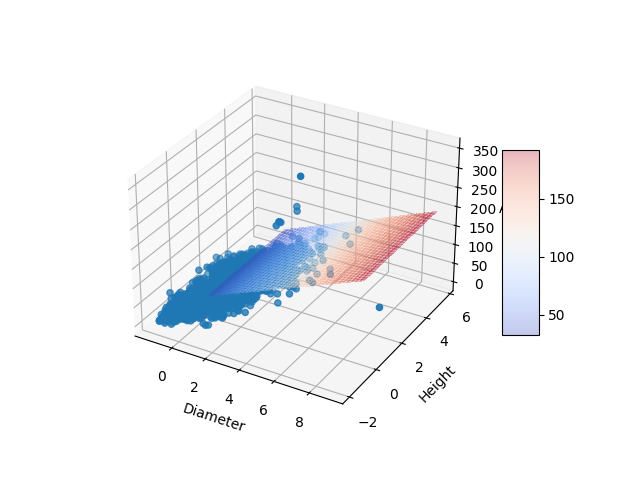

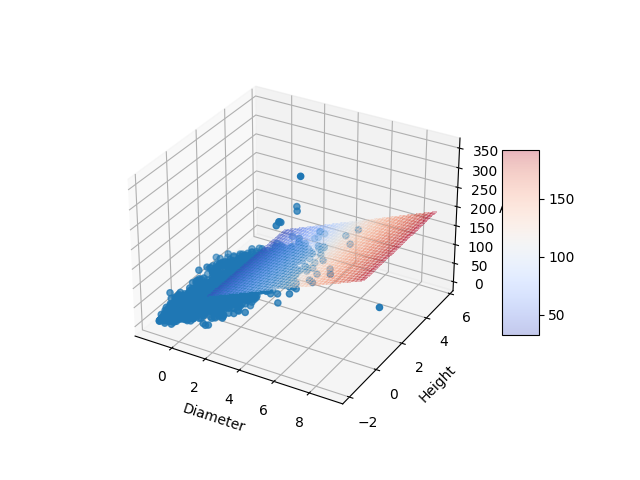

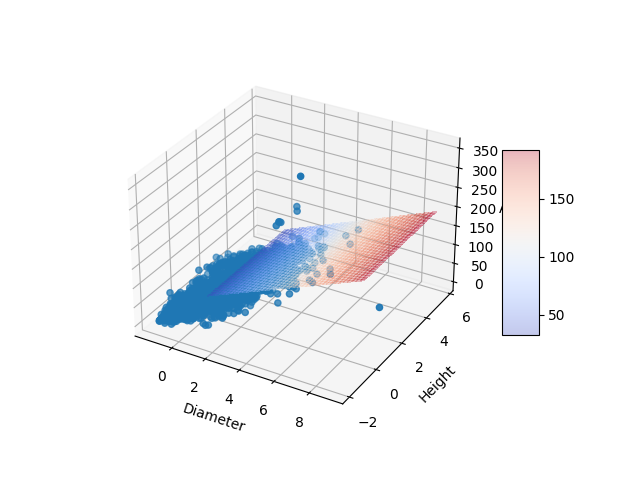

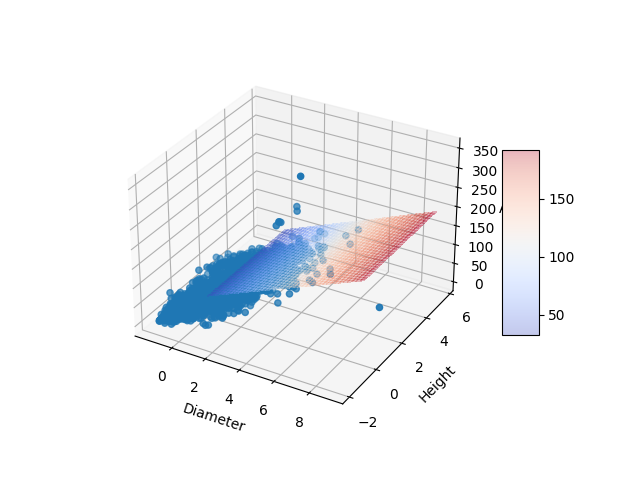

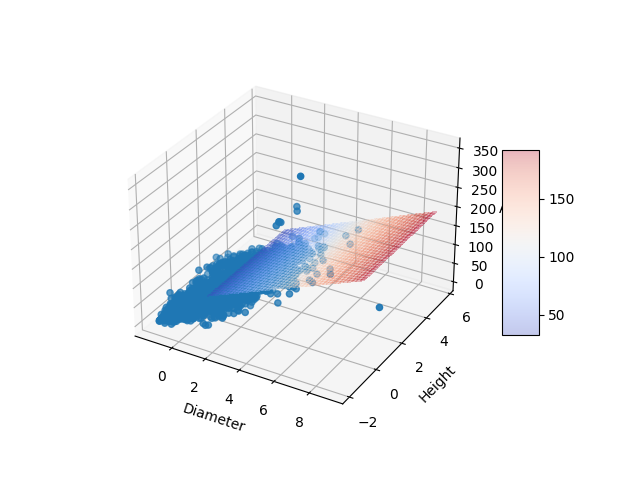

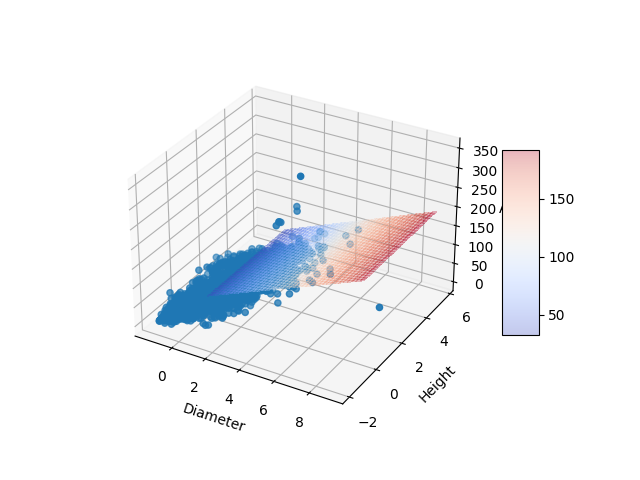

In [ ]:
for i in range(30):
  model_tree.fit(tree_n,tree_label,verbose=0,epochs=1)

  b=model_tree.layers[0].get_weights()[1][0]
  w=model_tree.layers[0].get_weights()[0]
  dia_range = np.linspace(0, np.max(tree_n[:, 0]), 40)
  h_range = np.linspace(0, np.max(tree_n[:, 1]), 40)
  dia_range, h_range = np.meshgrid(dia_range, h_range)
  b+=dia_range*w[0][0]+h_range*w[1][0]


  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  ax.scatter3D(tree_n[:,0], tree_n[:,1], tree_label[:], s = 20)
  surf = ax.plot_surface(dia_range, h_range, b, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.3)
  ax.set_xlabel('Diameter')
  ax.set_ylabel('Height')
  ax.set_zlabel('Age')
  fig.colorbar(surf, shrink=0.5, aspect=5)

  plt.show()

